In [29]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex

def disp(str):
    display(Latex(str))

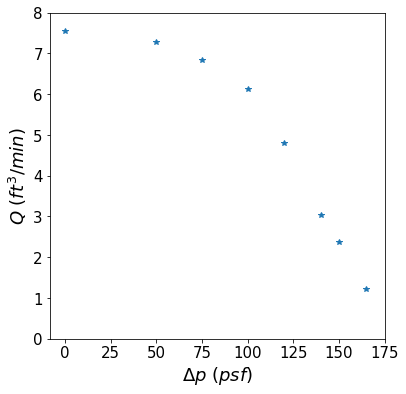

In [30]:
Q = [0,50,75,100,120,140,150,165]
dp = [7.54,7.29,6.85,6.12,4.8,3.03,2.38,1.23]

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
ax.plot(Q,dp,'*')
ax.set_xticks(np.arange(0,200,25))
ax.set_yticks(np.arange(0,9,1))
ax.set_xlabel(r'$\Delta p$ $(psf)$',fontsize=18)
ax.set_ylabel(r'$Q$ $(ft^3/min)$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

<IPython.core.display.Latex object>

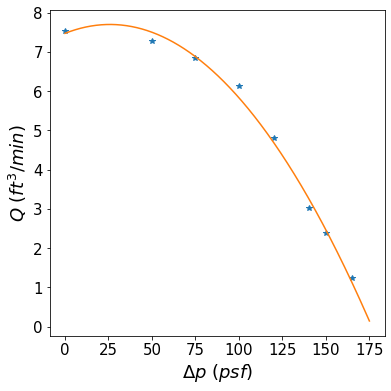

In [36]:
# fit cuadrático

z = np.polyfit(Q,dp,2)

# dp = z[0]*Q**2 + z[1]*Q + z[2]
disp('$\Delta p = (%4.2e) Q^2 + (%4.2e) Q + (%4.2e)$'%(z[0],z[1],z[2]))
pz = np.poly1d(z)

Q = [0,50,75,100,120,140,150,165]
dp = [7.54,7.29,6.85,6.12,4.8,3.03,2.38,1.23]

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)

ax.plot(Q,dp,'*')
ax.plot(np.linspace(0,175,1000),pz(np.linspace(0,175,1000)))

ax.set_xticks(np.arange(0,200,25))
ax.set_yticks(np.arange(0,9,1))
ax.set_xlabel(r'$\Delta p$ $(psf)$',fontsize=18)
ax.set_ylabel(r'$Q$ $(ft^3/min)$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

In [38]:
A_pi1 = [[0,0,1],[0,1,-3],[-1,0,0]]
b_pi1 =[-1,1,2]
print(np.linalg.solve(A_pi1,b_pi1))

[-2. -2. -1.]


In [41]:
A_pi2 = [[0,0,1],[0,1,-3],[-1,0,0]]
b_pi2 =[0,-3,1]
print(np.linalg.solve(A_pi2,b_pi2))

[-1. -3.  0.]


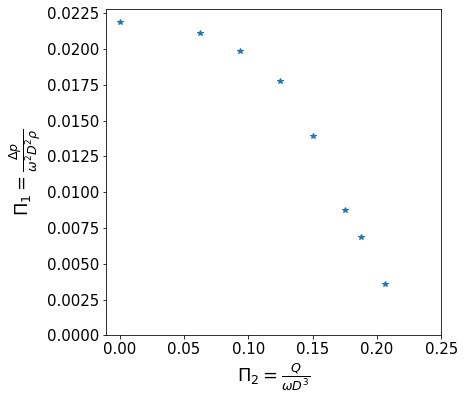

In [52]:
rho = 62.428 #lbm/ft3
omega = 800/60 # rps
D = 1 #ft3

Pi_1 = np.multiply(dp,32.174/(omega**2*D**2*rho)) #adim
Pi_2 = np.multiply(Q,1/60/(omega*D**3)) #admi

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)

ax.plot(Pi_2,Pi_1,'*')
#ax.plot(np.linspace(0,175,1000),pz(np.linspace(0,175,1000)))

ax.set_xticks(np.arange(0,0.3,0.05))
ax.set_yticks(np.arange(0,0.025,0.0025))
ax.set_xlabel(r'$\Pi_2= \frac{Q}{\omega D^3}$',fontsize=18)
ax.set_ylabel(r'$\Pi_1 = \frac{\Delta p}{\omega^2D^2\rho}$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)


<IPython.core.display.Latex object>

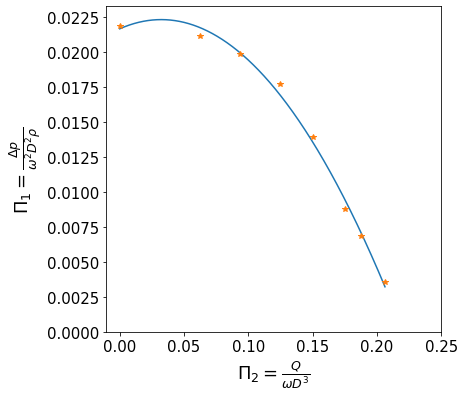

In [63]:
# fit cuadrático

z = np.polyfit(Pi_2,Pi_1,2)

# dp = z[0]*Q**2 + z[1]*Q + z[2]

pz = np.poly1d(z)


fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)

xplot=np.linspace(min(Pi_2),max(Pi_2),1000)
ax.plot(xplot,pz(xplot))

ax.plot(Pi_2,Pi_1,'*')
#ax.plot(np.linspace(0,175,1000),pz(np.linspace(0,175,1000)))

ax.set_xticks(np.arange(0,0.3,0.05))
ax.set_yticks(np.arange(0,0.025,0.0025))
ax.set_xlabel(r'$\Pi_2= \frac{Q}{\omega D^3}$',fontsize=18)
ax.set_ylabel(r'$\Pi_1 = \frac{\Delta p}{\omega^2D^2\rho}$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)

print('\n')
disp('$\Pi_1 = (%4.2e) \Pi_2^2 + (%4.2e) \Pi_2 + (%4.2e)$'%(z[0],z[1],z[2]))


In [59]:
'%4.2e'%(32.174/omega**2/D**2/rho)

'2.90e-03'

In [60]:
'%4.2e'%(1/60/omega/D**3)

'1.25e-03'

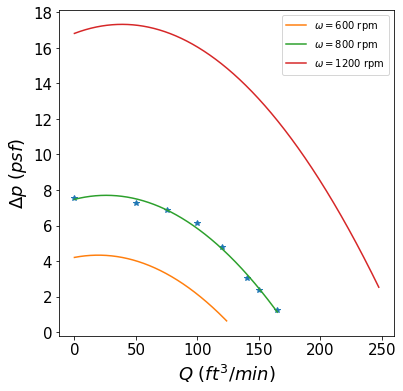

In [72]:
Q_600 = xplot*(600/60)*D**3*60 # ft3/min
dp_600 = pz(xplot)*(600/60)**2*D**2*rho # lbm/ft s
dp_600/= 32.174 #psf

Q_800 = xplot*(800/60)*D**3*60 # ft3/min
dp_800 = pz(xplot)*(800/60)**2*D**2*rho # lbm/ft s
dp_800/= 32.174 #psf

Q_1200 = xplot*(1200/60)*D**3*60 # ft3/min
dp_1200 = pz(xplot)*(1200/60)**2*D**2*rho # lbm/ft s
dp_1200/= 32.174 #psf

fig = plt.figure(figsize=(6,6))
ax  = fig.add_subplot(111)
ax.plot(Q,dp,'*')
ax.plot(Q_600,dp_600,label='$\omega=600$ rpm')
ax.plot(Q_800,dp_800,label='$\omega=800$ rpm')
ax.plot(Q_1200,dp_1200,label='$\omega=1200$ rpm')

plt.legend(loc='best')
ax.set_xticks(np.arange(0,300,50))
ax.set_yticks(np.arange(0,20,2))
ax.set_ylabel(r'$\Delta p$ $(psf)$',fontsize=18)
ax.set_xlabel(r'$Q$ $(ft^3/min)$',fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=15)
